# Analysis of the Root Network votes

The goal of this notebook is to have a better understanding of who is part of the root network (does it change often?) and which subnets they vote for (Do they change their vote often? Who votes for new subnets, who doesn't ?). 

In [58]:
import bittensor as bt
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
root_metagraph = bt.metagraph(netuid=0, lite=False)

2024-04-18 15:01:09.799 |       INFO       | You are connecting to finney network with endpoint wss://entrypoint-finney.opentensor.ai:443.
2024-04-18 15:01:09.800 |     WARNING      | We strongly encourage running a local subtensor node whenever possible. This increases decentralization and resilience of the network.
2024-04-18 15:01:09.800 |     WARNING      | In a future release, local subtensor will become the default endpoint. To get ahead of this change, please run a local subtensor node and point to it.
2024-04-18 15:01:10.710 |       INFO       | Connected to finney network and wss://entrypoint-finney.opentensor.ai:443.


In [66]:
W = root_metagraph.W.float()
weights = pd.DataFrame(W.numpy())
new_column_names = [f'SN{i}' for i in range(len(weights.columns))]
weights.columns = new_column_names
print(weights)

    SN0       SN1       SN2       SN3       SN4       SN5       SN6       SN7  \
0   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.5  0.500000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.0  0.091588  0.000000  0.020955  0.043329  0.021135  0.116247  0.009827   
3   0.0  0.000000  0.015101  0.015101  0.246295  0.025101  0.000000  0.035098   
4   0.0  0.016746  0.016746  0.047847  0.047847  0.047847  0.016746  0.016746   
..  ...       ...       ...       ...       ...       ...       ...       ...   
59  0.0  0.047618  0.000000  0.000000  0.047618  0.000000  0.000000  0.000000   
60  0.0  0.199998  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
61  1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
62  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
63  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         SN8       SN9  ...

In [67]:
hotkeys = root_metagraph.hotkeys
hotkeys = pd.DataFrame(hotkeys, columns=['hotkeys'])

In [68]:
stakes = pd.DataFrame((root_metagraph.stake.float()).numpy(), columns=['stakes'])

In [69]:
stakes_by_hotkey = pd.concat([hotkeys, stakes], axis=1)
root_network = stakes_by_hotkey.join(weights)

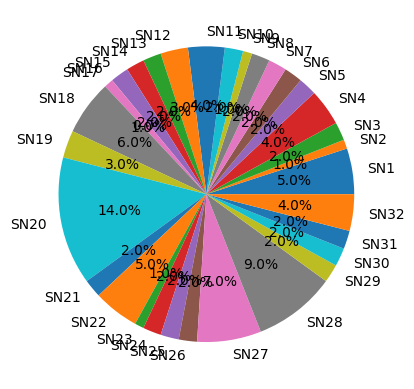

In [88]:
validator5F4t = root_network.iloc[5, 3:35]
plt.pie(validator5F4t, labels=validator5F4t.index, autopct='%1.1f%%')
plt.show()